<a href="https://colab.research.google.com/github/AmalBouhdid/Deep-Learning-Assignment/blob/main/Task_2_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN classifier

In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
import random
import seaborn as sns
import tensorflow as tf
from PIL import Image
from collections import Counter
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
extracted_dataset_path = "/content/drive/MyDrive/DeepLearningTask-1"

# Define paths to training and testing folders
train_folder = os.path.join(extracted_dataset_path, "Train")
test_folder = os.path.join(extracted_dataset_path, "Test")

# Function to count images in each class
def count_images_in_classes(folder_path):
    class_counts = {}
    for class_name in os.listdir(folder_path):
        class_path = os.path.join(folder_path, class_name)
        if os.path.isdir(class_path):
            class_counts[class_name] = len(os.listdir(class_path))
    return class_counts

# Count images in training and testing sets
train_class_counts = count_images_in_classes(train_folder)
test_class_counts = count_images_in_classes(test_folder)

# Display counts for training and testing sets
print("Training Set Class Distribution:")
for class_name, count in train_class_counts.items():
    print(f"{class_name}: {count} images")

print("\nTest Set Class Distribution:")
for class_name, count in test_class_counts.items():
    print(f"{class_name}: {count} images")


Training Set Class Distribution:
Bear: 346 images
Camel: 353 images
Chiken: 346 images
Elephent: 337 images
Horse: 355 images
Lion: 340 images
Squirrel: 315 images

Test Set Class Distribution:
BearTest: 10 images
CamelTest: 10 images
ChkenTest: 10 images
ElephenTest: 10 images
HorseTest: 10 images
LionTest: 10 images
SquirrelTest: 10 images


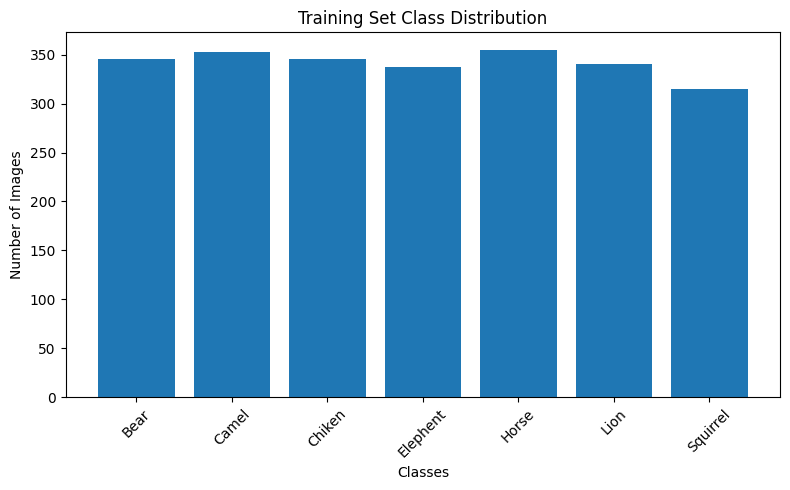

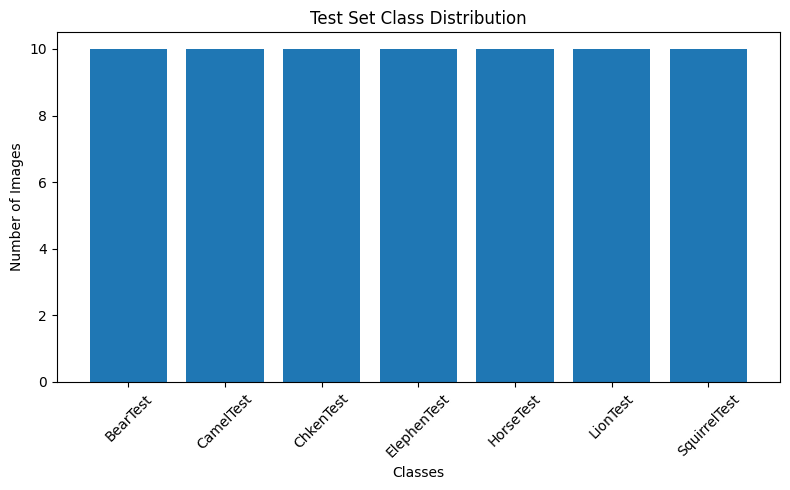

In [ ]:
# Visualize the class distribution
def plot_class_distribution(class_counts, title):
    classes = list(class_counts.keys())
    counts = list(class_counts.values())
    plt.figure(figsize=(8, 5))
    plt.bar(classes, counts)
    plt.title(title)
    plt.xlabel("Classes")
    plt.ylabel("Number of Images")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

plot_class_distribution(train_class_counts, "Training Set Class Distribution")
plot_class_distribution(test_class_counts, "Test Set Class Distribution")

In [ ]:
# Load the data (assuming images are in subfolders within Train and Test folders)
def load_data(folder_path):
    images = []
    labels = []
    for class_name in os.listdir(folder_path):
        class_path = os.path.join(folder_path, class_name)
        if os.path.isdir(class_path):
            for image_name in os.listdir(class_path):
                image_path = os.path.join(class_path, image_name)
                try:
                    img = Image.open(image_path) # Load the image
                    images.append(img)
                    labels.append(class_name)
                except Exception as e:
                    print(f"Error loading image {image_path}: {e}")

    return images, labels

# Load training and testing data
train_images_raw, train_labels = load_data(os.path.join(extracted_dataset_path, "Train"))
test_images_raw, test_labels = load_data(os.path.join(extracted_dataset_path, "Test"))

print(f"Loaded {len(train_images_raw)} training images and {len(test_images_raw)} testing images.")

Loaded 2392 training images and 70 testing images.


In [ ]:
# Define image dimensions
img_height, img_width = 128, 128

# Preprocess the data conversion
train_images = np.array([
    np.array(img.resize((img_height, img_width)))
    for img in train_images_raw
])


# Convert labels to numerical format using LabelEncoder
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_labels)

print(f"Classes: {label_encoder.classes_}")

Classes: ['Bear' 'Camel' 'Chiken' 'Elephent' 'Horse' 'Lion' 'Squirrel']


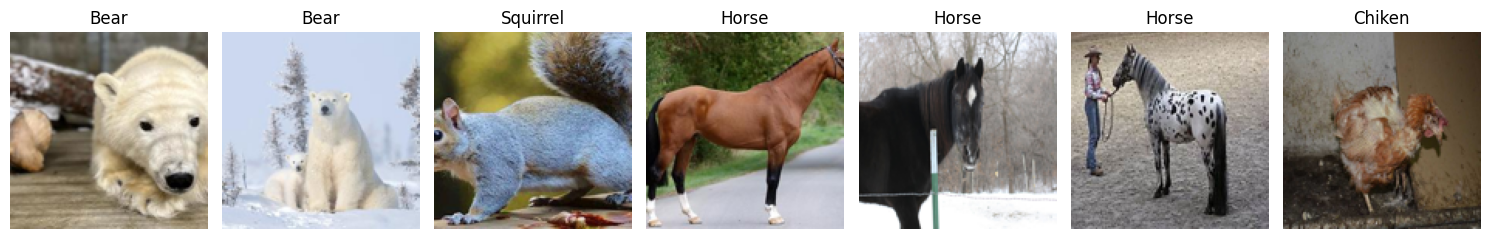

In [ ]:
# Assuming train_images and train_labels are defined as in the previous code

# Select 7 random indices
random_indices = random.sample(range(len(train_images)), 7)

# Create a figure and axes for the subplots
fig, axes = plt.subplots(1, 7, figsize=(15, 5))

# Iterate through the random indices and display the corresponding images
for i, index in enumerate(random_indices):
    axes[i].imshow(train_images[index])
    axes[i].set_title(train_labels[index])  # Display the original label
    axes[i].axis('off')  # Hide axis ticks and labels

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels_encoded, test_size=0.13, random_state=42, stratify=train_labels_encoded)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.15, random_state=42, stratify=y_train)

In [ ]:
X_train.shape , X_val.shape , X_test.shape

((1768, 128, 128, 3), (311, 128, 128, 3), (313, 128, 128, 3))

# CNN model 2

In [ ]:
checkpoint = ModelCheckpoint(
    filepath="model_checkpoint.keras",
    monitor='val_accuracy',   # Monitor validation loss
    save_best_only=True,  # Save only the model with the best validation loss
    verbose=1
)

early_stopping = EarlyStopping(
    monitor='val_accuracy',   # Monitor validation loss
    patience=5,           # Number of epochs with no improvement after which training will be stopped
    verbose=1
)

data_augument = keras.Sequential([
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])

model_2 = keras.Sequential([
    layers.Input(shape=(img_height, img_width, 3)),
    layers.BatchNormalization(),
    data_augument,
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(len(label_encoder.classes_), activation='softmax') # Output layer with softmax for multi-class classification
])

model_2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy', # Use sparse_categorical_crossentropy since labels are integers
              metrics=['accuracy'])

In [ ]:
model_2.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ batch_normalization_2                │ (None, 128, 128, 3)         │              12 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_4 (Sequential)            │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 57600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │       3,686,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 7)                   │             455 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,706,323 (14.14 MB)

 Trainable params: 3,706,317 (14.14 MB)

 Non-trainable params: 6 (24.00 B)

In [ ]:
history = model_2.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,
    batch_size=32,
    verbose=1,
    callbacks=[checkpoint, early_stopping]
)

Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.2886 - loss: 2.0524
Epoch 1: val_accuracy improved from -inf to 0.36013, saving model to model_checkpoint.keras
56/56 ━━━━━━━━━━━━━━━━━━━━ 68s 1s/step - accuracy: 0.2895 - loss: 2.0477 - val_accuracy: 0.3601 - val_loss: 1.8357
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4734 - loss: 1.4991
Epoch 2: val_accuracy improved from 0.36013 to 0.44373, saving model to model_checkpoint.keras
56/56 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.4730 - loss: 1.4995 - val_accuracy: 0.4437 - val_loss: 1.5333
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4601 - loss: 1.4413
Epoch 3: val_accuracy improved from 0.44373 to 0.49839, saving model to model_checkpoint.keras
56/56 ━━━━━━━━━━━━━━━━━━━━ 66s 1s/step - accuracy: 0.4605 - loss: 1.4406 - val_accuracy: 0.4984 - val_loss: 1.5269
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5401 - loss: 1.2580
Epoch 4: val_accuracy did not improve fro

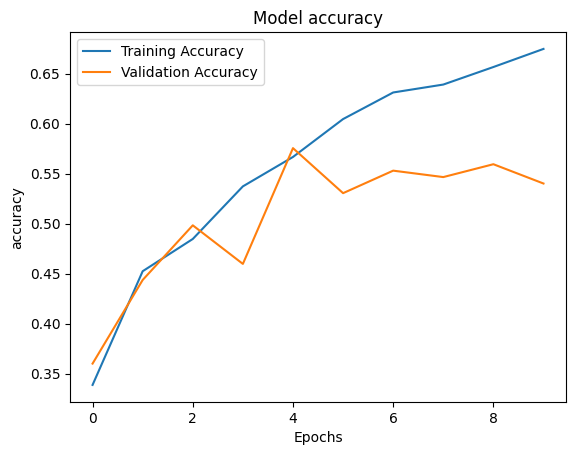

10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 368ms/step - accuracy: 0.6114 - loss: 1.1354
Test Loss: [1.1991941928863525, 0.5942491888999939]


In [ ]:
# Plot the training loss
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

# Evaluate on the test set
test_loss = model_2.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")

In [ ]:
loss, accuracy = model_2.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy * 100:.2f}%")
cnn_accuracy = accuracy

Test Loss: 1.1992
Test Accuracy: 59.42%


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 228ms/step


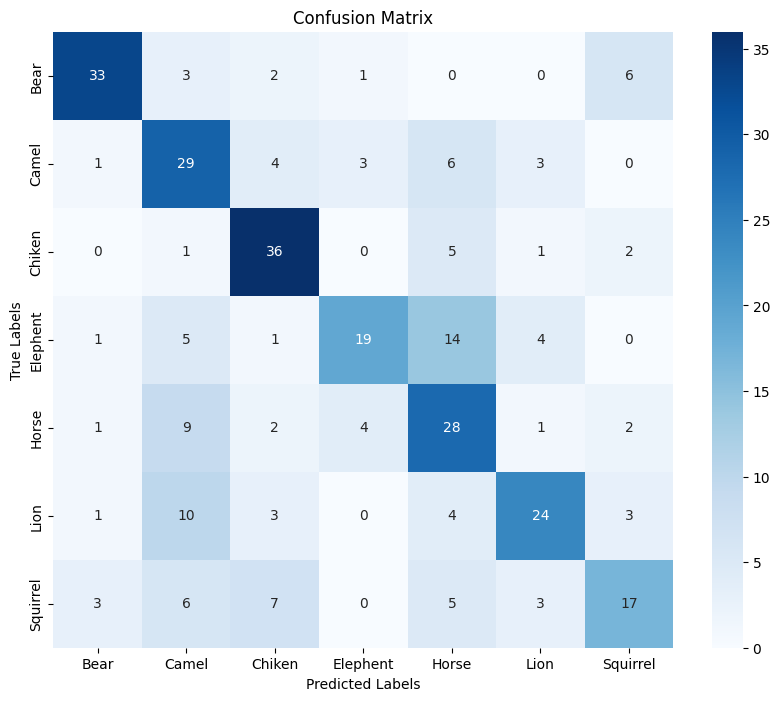

In [ ]:
# Predict the labels for the test set
y_pred = model_2.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
report = classification_report(y_test, y_pred_classes, target_names=label_encoder.classes_)
print(report)

              precision    recall  f1-score   support

        Bear       0.82      0.73      0.78        45
       Camel       0.46      0.63      0.53        46
      Chiken       0.65      0.80      0.72        45
    Elephent       0.70      0.43      0.54        44
       Horse       0.45      0.60      0.51        47
        Lion       0.67      0.53      0.59        45
    Squirrel       0.57      0.41      0.48        41

    accuracy                           0.59       313
   macro avg       0.62      0.59      0.59       313
weighted avg       0.62      0.59      0.59       313



In [ ]:
# Evaluate the model on the test data
test_images = np.array([np.array(img.resize((img_height, img_width))) for img in test_images_raw])
#test_images = test_images.astype('float32') / 255.0
test_labels_encoded = label_encoder.fit_transform(test_labels)

label_encoder.classes_

array(['BearTest', 'CamelTest', 'ChkenTest', 'ElephenTest', 'HorseTest',
       'LionTest', 'SquirrelTest'], dtype='<U12')

In [ ]:
loss, accuracy = model_2.evaluate(test_images, test_labels_encoded, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")
cnn_accuracy = accuracy

Test Loss: 0.8773
Test Accuracy: 0.6571


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 133ms/step


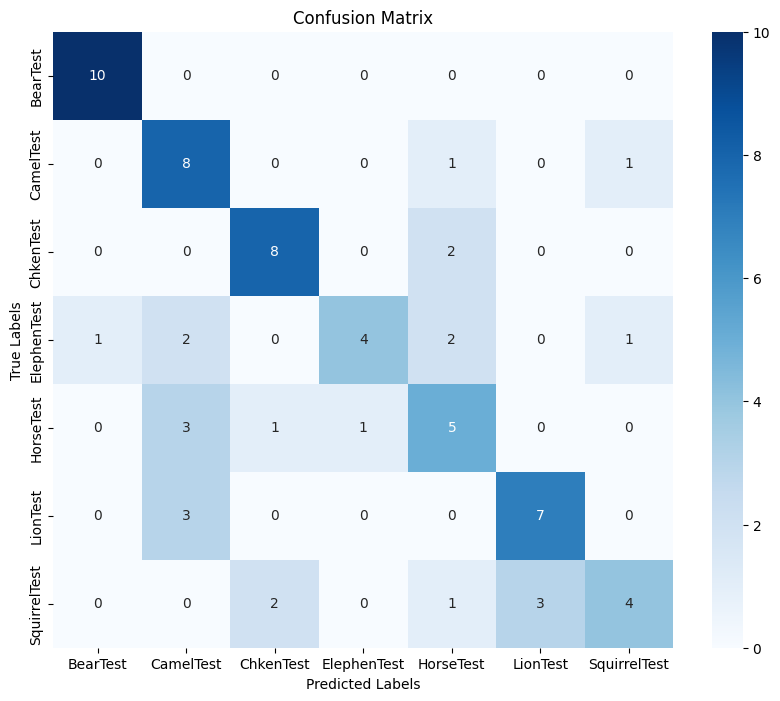

In [ ]:
# Predict the labels for the test set
y_pred = model_2.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(test_labels_encoded, y_pred_classes)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# Generate a classification report
report = classification_report(test_labels_encoded, y_pred_classes, target_names=label_encoder.classes_)
print(report)

              precision    recall  f1-score   support

    BearTest       0.91      1.00      0.95        10
   CamelTest       0.50      0.80      0.62        10
   ChkenTest       0.73      0.80      0.76        10
 ElephenTest       0.80      0.40      0.53        10
   HorseTest       0.45      0.50      0.48        10
    LionTest       0.70      0.70      0.70        10
SquirrelTest       0.67      0.40      0.50        10

    accuracy                           0.66        70
   macro avg       0.68      0.66      0.65        70
weighted avg       0.68      0.66      0.65        70



3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step


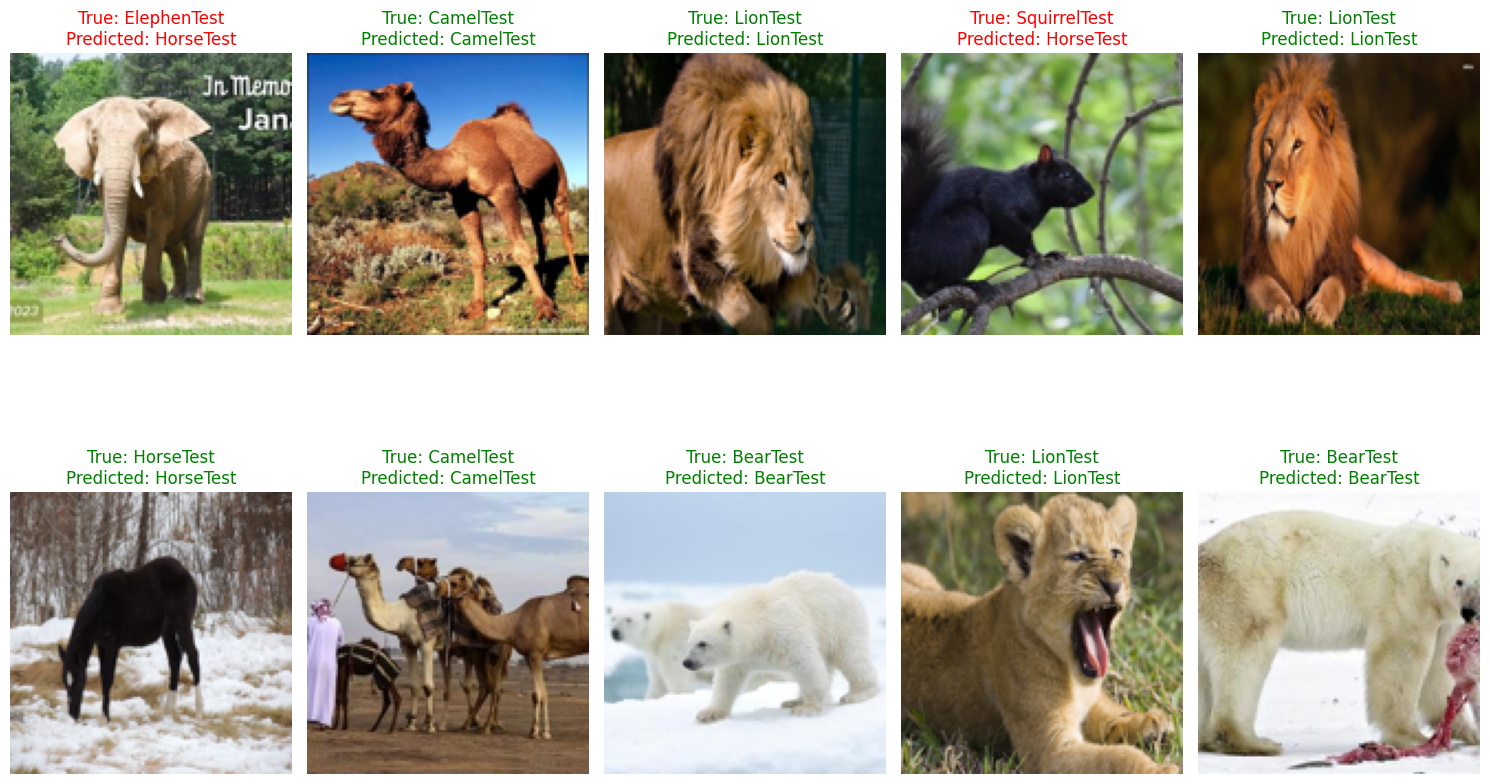

In [ ]:
# Function to visualize predictions
def visualize_predictions(model, test_images, test_labels_encoded, label_encoder, num_images=10):
    # Get predictions
    predictions = np.argmax(model_2.predict(test_images), axis=1)

    # Randomly select images to display
    indices = np.random.choice(len(test_images), num_images, replace=False)

    plt.figure(figsize=(15, 10))
    for i, idx in enumerate(indices):
        img = test_images[idx]
        true_label = label_encoder.inverse_transform([test_labels_encoded[idx]])[0]
        predicted_label = label_encoder.inverse_transform([predictions[idx]])[0]

        plt.subplot(2, 5, i + 1)
        if img.shape[-1] == 1:  # If grayscale, remove channel dimension for display
            plt.imshow(img.squeeze(), cmap="gray")
        else:
            plt.imshow(img)
        plt.title(f"True: {true_label}\nPredicted: {predicted_label}", color="green" if true_label == predicted_label else "red")
        plt.axis("off")

    plt.tight_layout()
    plt.show()

# Call the visualization function
visualize_predictions(model_2, test_images, test_labels_encoded, label_encoder, num_images=10)
